# S8 4.0 Análisis Exploratorio de Datos

## 4.1 Importar librerías de uso

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
import math

## 4.2 Importar las vistas resultantes de nuestro Análisis en SQL

In [2]:
result_1 = pd.read_csv('moved_project_sql_result_01.csv', sep= ',')
result_4 = pd.read_csv('moved_project_sql_result_04.csv', sep= ',')
result_7 = pd.read_csv('moved_project_sql_result_07.csv', sep= ',')

* Guardar los archivos en el directorio principal

In [3]:
result_1.to_csv('result_1')
result_4.to_csv('result_4')
result_7.to_csv('result_7')

## 4.3.1 Visualizar las vistas, revisar los tipos de datos, duplicados y valores nulos en results_1

In [4]:
result_1.info()
result_1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [5]:
result_1.duplicated().sum()

np.int64(0)

### Observaciones de los datos de los resultados_1

Extrajimos los datos resultantes del análisis 01, donde obtuvimos la cantidad de viajes realizados por compañía de Taxis para los días 15 y 16 de Noviembre del 2017.

Las nombres de las columnas son descriptivos y sencillos, usan formato snake_case.
Sus tipos de datos son de tipo objeto para el nombre de la compañía y de entero para la cantidad de viajes, lo cual me parece correcto ya que no importa la distancia, si hay un inicio y fin se considera como viaje y no da cabidad a números con decimales, sólo enteros.
Igual revisaremos si hay algún duplicado.

* Cambiaré a mayúsculas el nombre de las compañías en búsqueda de duplicados.

In [6]:
result_1['company_name'] = result_1['company_name'].str.upper()

result_1.head(10)

,company_name,trips_amount
0,FLASH CAB,19558
1,TAXI AFFILIATION SERVICES,11422
2,MEDALLION LEASIN,10367
3,YELLOW CAB,9888
4,TAXI AFFILIATION SERVICE YELLOW,9299
5,CHICAGO CARRIAGE CAB CORP,9181
6,CITY SERVICE,8448
7,SUN TAXI,7701
8,STAR NORTH MANAGEMENT LLC,7455
9,BLUE RIBBON TAXI ASSOCIATION INC.,5953


In [7]:
result_1.duplicated().sum()

np.int64(0)

* Obtendré el Market Share de la compañia °1 Flash Cab a modo de referencia

In [8]:
total = result_1['trips_amount'].sum()
MS_flash = (19558 * 100) / total
MS_flash

np.float64(14.243578446009424)

## 4.3.2 Visualizar las vistas, revisar los tipos de datos, duplicados y valores nulos en results_4

In [9]:
result_4.info()
result_4.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [10]:
result_4.duplicated().sum()

np.int64(0)

In [11]:
result_4['dropoff_location_name'] = result_4['dropoff_location_name'].str.upper()

result_4.head(10)

,dropoff_location_name,average_trips
0,LOOP,10727.466667
1,RIVER NORTH,9523.666667
2,STREETERVILLE,6664.666667
3,WEST LOOP,5163.666667
4,O'HARE,2546.900000
5,LAKE VIEW,2420.966667
6,GRANT PARK,2068.533333
7,MUSEUM CAMPUS,1510.000000
8,GOLD COAST,1364.233333
9,SHEFFIELD & DEPAUL,1259.766667


In [12]:
result_4.duplicated().sum()

np.int64(0)

### Observaciones de los datos de los resultados_04

Extrajimos los datos resultantes del análisis 04, donde obtuvimos el promedio de viajes realizados para cada finalización de viajes.

Las nombres de las columnas son descriptivos y sencillos, usan formato snake_case.
Sus tipos de datos son de tipo objeto para la locación donde finalizaron los viajes y de tipo flotante para el promedio de viajes realizados a ese lugar, lo cual me parece correcto, no requerimos realizar cambios de momento.
Igual revisé si algún nombre estaba duplicado para la finalización de los viajes y no hay, de igual manera no hay valores ausente.

## 4.4 Elaboración de gráficas

* Realizaremos una gráfica para observar la cantidad de viajes realizados por compañía

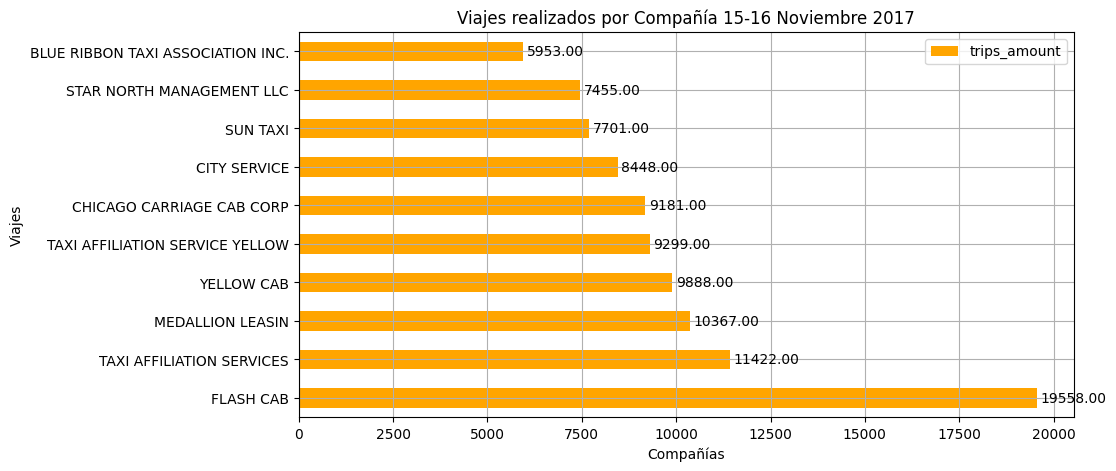

In [13]:
top_10_empresas = result_1.head(10)

ax = top_10_empresas.plot(
    x='company_name',  
    y='trips_amount',
    title= 'Viajes realizados por Compañía 15-16 Noviembre 2017',
    kind='barh',
    ylabel='Viajes',
    xlabel='Compañías',
    figsize=[10, 5],
    rot=0,
    color='orange',
    grid=True
)

bars = ax.patches  
for bar in bars:
    ax.text(
        bar.get_width() + 100,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.2f}',  
        va='center'  
    )


plt.show()


#### Conclusiones de los resultados

Podemos ver que la compañía número 1° 'Flash Cab' está por encima de la competencia, sus viajes son el doble del 95% de la competencia.

Sólo hay 3 compañías de taxis que están por enciam de los 10K viajes: 'Flash Cab, TAXI AFFILIATION SERVICES, Medallion Leasin'

En este periodo el MS de Flash Cab fue del 14%, es muy grande para la cantidad de competidores en el mercado, podemos suponer que sacó alguna promoción para estos días, o bien que su interfaz de usuario es más amigable que las demás, o que brinda diferentes tipos de pago, o investigar a profundidad por qué la prefieren los usuarios, probablemente tengan más unidades móviles que las demás compañias que les permita abastecer la demanda para estas fechas a diferencia de las demás compañías que quedan saturadas.

* Elaboraremos una gráfica para visualizar el top 10 de los barrios principales en viajes finalizados

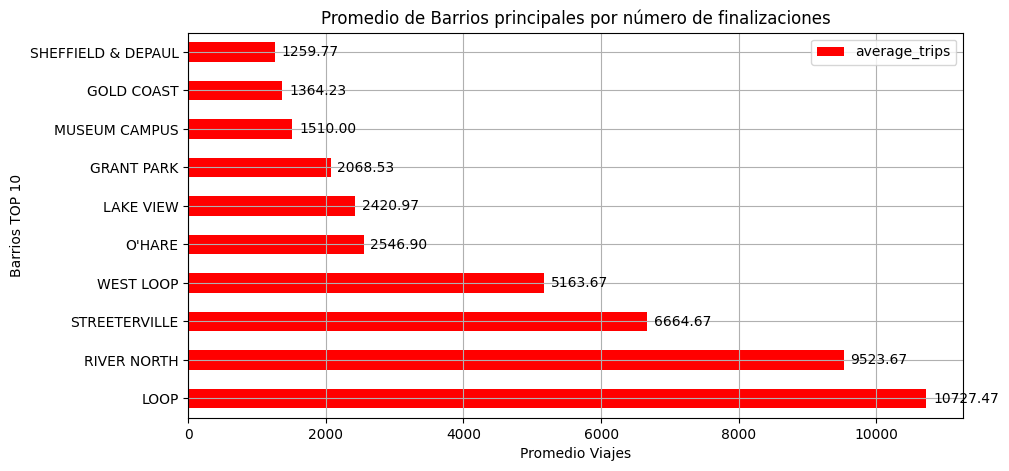

In [14]:
top_10_barrios = result_4.head(10)

ax = top_10_barrios.plot(
    x='dropoff_location_name',  # Utilizar los nombres de los barrios en el eje Y
    y='average_trips',
    title= 'Promedio de Barrios principales por número de finalizaciones',
    kind='barh',
    ylabel='Barrios TOP 10',
    xlabel='Promedio Viajes',
    figsize=[10, 5],
    rot=0,
    color='red',
    grid=True
)

bars = ax.patches  
for bar in bars:
    ax.text(
        bar.get_width() + 100,  
        bar.get_y() + bar.get_height() / 2,  
        f'{bar.get_width():.2f}',  
        va='center'  
    )


plt.show()


#### Conclusiones de los Resultados

En el TOP 10 de Barrios preferidos por los clientes, tenemos que el Loop es el barrio con el promedio de finalización de viajes más grande, seguido de River North.
Esto pueder ser debido a que estos lugares reúnen diversas actividades y gustos para las personas, como la Arquitectura, los clubes nocturnos, museos de arte, centros comerciales y el paseo a lo largo del Río Chicago donde la gente puede ir a caminar, ejercitarse y andar en bicicleta.

## Prueba de Hipótesis 5.0

* Realizaremos un vistazo a los datos y ver que podemos notar u observar.

In [15]:
result_7.info()
result_7.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
5,2017-11-11 04:00:00,Good,1320.0
6,2017-11-04 16:00:00,Bad,2969.0
7,2017-11-18 11:00:00,Good,2280.0
8,2017-11-11 14:00:00,Good,2460.0
9,2017-11-11 12:00:00,Good,2040.0


In [16]:
good_weather = result_7[result_7['weather_conditions'] == 'Good']['duration_seconds']
good_weather.describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

In [17]:
bad_weather = result_7[result_7['weather_conditions'] == 'Bad']['duration_seconds']
bad_weather.describe()

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

* Eliminamos los valores atípicos

In [18]:
Q1 = result_7['duration_seconds'].quantile(.25)
Q3 = result_7['duration_seconds'].quantile(.75)
IQR = Q3 - Q1 
inferior = Q1 - 1.5 * IQR
superior = Q3 + 1.5 * IQR
r7_sin_oufilers = result_7[(result_7['duration_seconds'] > inferior) & (result_7['duration_seconds'] < superior )]
r7_sin_oufilers

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [19]:
bad_weather_2 = r7_sin_oufilers[r7_sin_oufilers['weather_conditions'] == 'Bad']['duration_seconds']
good_weather_2 = r7_sin_oufilers[r7_sin_oufilers['weather_conditions'] == 'Bad']['duration_seconds']


* Observaciones de los datos de los resultados_7

La tabla de resultados 07 ya está filtrada para tener solamente los resultados para los días Sábados por lo que no es necesario cambiar el tipo de dato a fecha para extraer el día porque eso ya se hizo en la extracción de datos en SQL, sólo tenemos que dividir los viajes por aquellos con buen clima y aquellos con mal clima.

A simple vista podemos notar que numericamente el promedio de tiempo que se tarda en llegar al Aeropuerto desde el barrio Loop diferente en días lluviosos que en un día normal, sin embargo, realizaremos una prueba de hipótesis para validar esta información.

Y podemos ver que el valor de la desviación estándar es cercana, por lo que podríamos tener una igualdad entre las varianzas, realizaremos una prueba de Levene para validar esto.

## 5.1 Prueba de Hipótesis

* Primero revisaremos si las varianzas son iguales, para ello realizaremos una prueba de Levene

H Nula = Las varianzas son iguales

H Alternativa = Las varianzas son diferentes

In [20]:
alpha = 0.05

p_levenne = st.levene(bad_weather_2, good_weather_2).pvalue
print(f'{p_levenne:.1%}')

if p_levenne > alpha:
    print('No se rechaza la hipótesis nula de que las varianzas sean iguales')
else:
    print('Si se rechaza la hipótesis nula de que las varianzas sean iguales')


100.0%
No se rechaza la hipótesis nula de que las varianzas sean iguales


* Al tener conocimiento de que no se rechaza que las varianzas sean iguales, procedemos a realizar nuestra prueba de hipótesis sobre si la duración promedio en días lluviosos es diferente.

H Nula = 'La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos'

H Alternativa = "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [21]:
p_alpha = 0.05

p = st.ttest_ind(bad_weather_2, good_weather_2, equal_var= True).pvalue
print(p)

print(f'Valor p es igual a {p:.1%}')

if p > p_alpha:
    print('No se rechaza la hipótesis nula de que la duración promedio no cambie en días lluviosos')
else:
    print('Si se rechaza la hipótesis nula de que la duración promedio cambie en días lluviosos')

1.0
Valor p es igual a 100.0%
No se rechaza la hipótesis nula de que la duración promedio no cambie en días lluviosos


Como resultado tenemos que la duración promedio en días lluviosos no es diferente a un día con condiciones meteorológicas buenas.